In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

data = np.array(pd.read_excel('PS5_data.xlsx'))
print(data)

#alpha = 44 / 28.97 * 10**(-6) * 5.136 * 10**18 * 12 / 44 * 10**(-12)
#print(alpha)

[[1986.            2.62112676  347.61      ]
 [1987.            2.68779343  349.31      ]
 [1988.            2.78685446  351.69      ]
 [1989.            2.84788732  353.2       ]
 [1990.            2.85164319  354.45      ]
 [1991.            2.88356808  355.7       ]
 [1992.            2.85352113  356.54      ]
 [1993.            2.84976526  357.21      ]
 [1994.            2.89859155  358.96      ]
 [1995.            2.9600939   360.97      ]
 [1996.            3.02723005  362.74      ]
 [1997.            3.07793427  363.88      ]
 [1998.            3.08732394  366.84      ]
 [1999.            3.08028169  368.54      ]
 [2000.            3.16103286  369.71      ]
 [2001.            3.23615023  371.32      ]
 [2002.            3.28356808  373.45      ]
 [2003.            3.4629108   375.98      ]
 [2004.            3.63521127  377.7       ]]


# 1. Modeling of carbon cycle

## 1.1

In [2]:
def Box2(_N1_init, _N2_init, _k12, _k21, _gam, _num):
    #创建一个num行2列np数组，代表模拟时长内所有时刻的N1和N2值
    N = np.zeros((_num+1, 2))
    #设置N1和N2的初始值
    N[0, 0] = _N1_init
    N[0, 1] = _N2_init
    for i in range(_num):
        #假设dt为一个单位时间，所以下面可以省略（一个时间单位是代表多长时间由num和总时长决定）
        dN1 = -_k12*N[i, 0] + _k21*N[i, 1] + _gam[i]
        dN2 = _k12*N[i, 0] - _k21*N[i, 1]
        #根据第i时刻的N1和N2值计算第i+1时刻的N1和N2的值
        N[i+1, 0] = N[i, 0] + dN1
        N[i+1, 1] = N[i, 1] + dN2
    return N

#设置参数
N1_init = 740/2.13
N2_init = 900/2.13
k12 = 105/740
k21 = 102/900
gam = data[:, 1]
num = 2004-1987+1 #num=18

#问题1 two-box计算的结果
N_q1 = Box2(N1_init, N2_init, k12, k21, gam, num)
print(N_q1)

[[347.41784038 422.53521127]
 [348.63051643 423.94366197]
 [349.89741467 425.36455716]
 [351.24464614 426.80418015]
 [352.62490652 428.27180709]
 [353.97940607 429.76895074]
 [355.34331428 431.28861061]
 [356.65587614 432.82956987]
 [357.9530823  434.38212897]
 [359.29100841 435.94279441]
 [360.67747141 437.5164253 ]
 [362.11268755 439.10843921]
 [363.57539062 440.72367042]
 [365.02299719 442.36338779]
 [366.4439925  444.02267416]
 [367.93216374 445.69553579]
 [369.4738839  447.38996587]
 [371.03629971 449.11111813]
 [372.75142804 450.8589006 ]]


# 1.2

In [3]:
#定义ξ函数
def Xi(_z):
    return 3.69 + 1.86*0.01*_z - 1.80*0.000001*_z**2

# print(Xi(0.1))

def Box2_buffer(_N1_init, _N2_init, _N0_2, _k12, _k21, _gam, _num):
    #创建一个num行2列np数组，代表模拟时长内所有时刻的N1和N2值
    N = np.zeros((_num+1, 2))
    #设置N1和N2的初始值
    N[0, 0] = _N1_init
    N[0, 1] = _N2_init
    for i in range(_num):
        #假设dt为一个单位时间，所以下面可以省略（一个时间单位是代表多长时间由num和总时长决定）
        dN1 = -_k12*N[i, 0] + _k21*(_N0_2 + Xi(N[i, 0])*(N[i, 1] - _N0_2)) + _gam[i]
        dN2 = _k12*N[i, 0] - _k21*(_N0_2 + Xi(N[i, 0])*(N[i, 1] - _N0_2))
        #根据第i时刻的N1和N2值计算第i+1时刻的N1和N2的值
        N[i+1, 0] = N[i, 0] + dN1
        N[i+1, 1] = N[i, 1] + dN2
    return N

#设置参数
N1_init = 740/2.13
N2_init = 900/2.13
N0_2 = 821/2.13
k12 = 105/740
k21 = 102/900
gam = data[:, 1]
num = 2004-1987+1 #num=18

#问题2 two-box计算的结果
N_q2 = Box2_buffer(N1_init, N2_init, N0_2, k12, k21, gam, num)
print(N_q2)

[[347.41784038 422.53521127]
 [386.18707365 386.38710476]
 [378.89299635 396.36897548]
 [384.57422315 393.47460314]
 [386.16199435 394.73471926]
 [389.06751576 394.68084105]
 [391.58025927 395.05166561]
 [394.20121502 395.28423099]
 [396.77870053 395.55651074]
 [399.4215108  395.81229202]
 [402.11682212 396.07707459]
 [404.87760046 396.3435263 ]
 [407.68432045 396.61474058]
 [410.49889226 396.88749271]
 [413.30878536 397.1578813 ]
 [416.20232786 397.42537167]
 [419.16321626 397.7006335 ]
 [422.16859048 397.97882736]
 [425.35198461 398.25834403]]


## 1.3

[347.61 349.31 351.69 353.2  354.45 355.7  356.54 357.21 358.96 360.97
 362.74 363.88 366.84 368.54 369.71 371.32 373.45 375.98 377.7 ]


Text(0, 0.5, '$\\mathregular{CO_2}$ Concentration (ppm)')

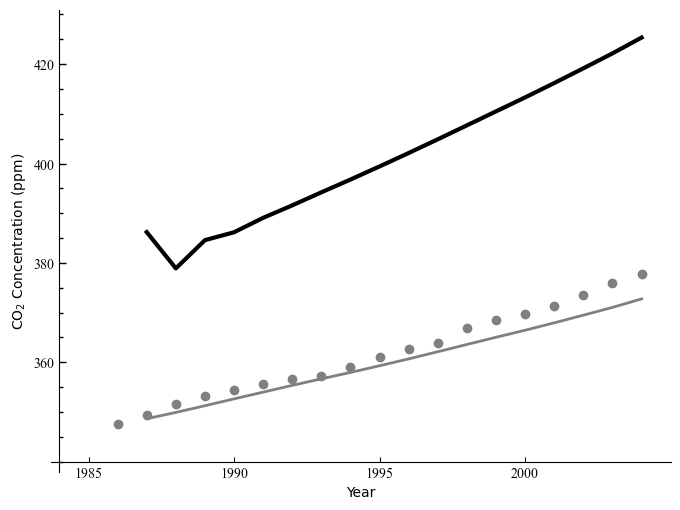

In [4]:
N_monitor = data[:, 2]
print(N_monitor)

N_q1_plot = N_q1
N_q2_plot = N_q2
year1 = [i+1986 for i in range(2004-1987+2)]
year2 = [i+1987 for i in range(2004-1987+1)]

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(year1, N_monitor[:], color='grey') #设置散点图颜色为灰色
ax.plot(year2, N_q1_plot[1:, 0], 'grey', linewidth=2) #设置折线图图颜色为灰色，并设置线宽为2
ax.plot(year2, N_q2_plot[1:, 0], 'k', linewidth=3) #设置折线图图颜色为黑色，并设置线宽为3

ax.tick_params(axis='both', direction='in') #设置x，y刻度线朝内
ax.set_xlim(1983.7, 2005) #设置x坐标范围，并且稍微大一点点，为了体现图里的交叉效果
ax.set_ylim(338, 431) #设置y坐标范围，并且稍微大一点点，为了体现图里的交叉效果
ax.set_xticks(range(1985, 2004, 5)) #设置x轴主刻度值
ax.set_yticks(range(360, 421, 20)) #设置y轴主刻度值
plt.tick_params(axis='x', labelsize=10, labelfontfamily='Times New Roman') #设置x轴刻度字体大小为10，字体为新罗马
plt.tick_params(axis='y', labelsize=10, labelfontfamily='Times New Roman') #设置x轴刻度字体大小为10，字体为新罗马
ax.tick_params(axis="y", which="major", direction="in", width=1, length=5) #设置y轴主刻度线朝内，线宽为1，线长为5
ax.tick_params(axis="y", which="minor", direction="in", width=1, length=3) #设置y轴副刻度线朝内，线宽为1，线长为3
ax.yaxis.set_minor_locator(MultipleLocator(5)) #设置y轴副刻度线间隔为5

#设置交叉点位置，联合上面的稍大的x轴与y轴的范围，则可以达到交叉的效果
ax.spines['bottom'].set_position(('data', 340))
ax.spines['left'].set_position(('data', 1984))

#设置坐标轴标题
plt.xlabel('Year')
plt.ylabel('$\mathregular{CO_2}$ Concentration (ppm)') #\mathregular{｝保证不是斜体公式

## Bonus

Text(0, 0.5, '$\\mathregular{CO_2}$ Concentration (ppm)')

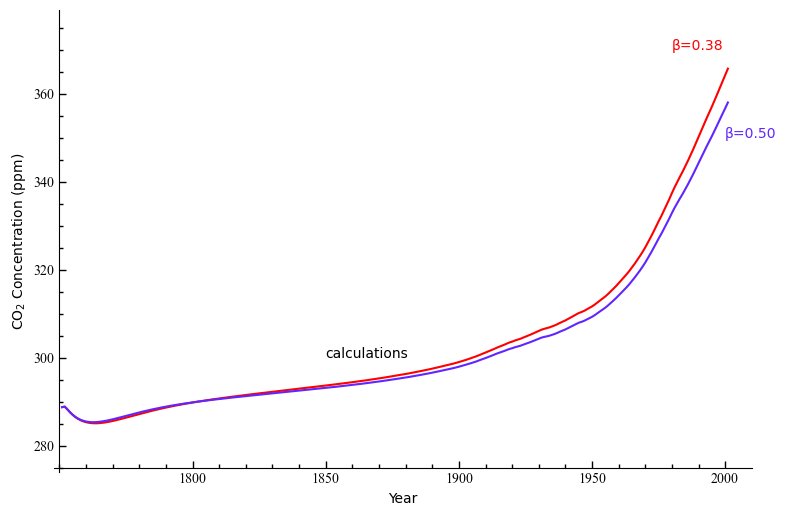

In [5]:
#读取gam数据
data_Bonus = np.array(pd.read_excel('PS5_data_box7.xlsx'))

#定义ξ函数
def Xi(_z):
    return 3.69 + 1.86*0.01*_z - 1.80*0.000001*_z**2

#定义f函数，加上β参数，方便计算两个不同β的取值
def f(_Beta, _P):
    _f0 = 62/2.13
    _P0 = 289
    return _f0*(1 + _Beta*np.log(_P/_P0)) 

#定义七箱模型
def Box7(_N_init, _N0_2, _k_ls, _gam, _delta, _Beta, _num):
    N = np.zeros((_num+1, 7))
    
    for j in range(7):
        N[0, j] = _N_init[j]
        
    for i in range(_num):
        dN = [0 for j in range(7)]
        dN[0] = -_k_ls[12]*N[i, 0] + _k_ls[21]*(_N0_2 + Xi(N[i, 0])*(N[i, 1] - _N0_2)) \
        + gam[i] - f(_Beta, N[i, 0]) + delta + _k_ls[51]*N[i, 4] + _k_ls[71]*N[i, 6]
        #print(f(N[i, 0]))
        dN[1] = _k_ls[12]*N[i, 0] - _k_ls[21]*(_N0_2 + Xi(N[i, 0])*(N[i, 1] - _N0_2)) \
        - _k_ls[23]*N[i, 1] + _k_ls[32]*N[i, 2] - _k_ls[24]*N[i, 1]
        dN[2] = _k_ls[23]*N[i, 1] - _k_ls[32]*N[i, 2] - _k_ls[34]*N[i, 2] + _k_ls[43]*N[i, 3]
        dN[3] = _k_ls[34]*N[i, 2] - _k_ls[43]*N[i, 3] + _k_ls[24]*N[i, 1] - _k_ls[45]*N[i, 3]
        dN[4] = _k_ls[45]*N[i, 3] - _k_ls[51]*N[i, 4]
        dN[5] = f(_Beta, N[i, 0]) - _k_ls[67]*N[i, 5] - 2*delta
        dN[6] = _k_ls[67]*N[i, 5] - _k_ls[71]*N[i, 6] + delta
        
        for j in range(7):
            N[i+1, j] = N[i, j] + dN[j]
    
    return N

#设定不同层的初始值
N_init = np.array([615, 842, 9744, 26280, 90000000, 731, 1238])/2.13
#N0_2 = 289
N0_2 = 837/2.13
#本来写的是列表形式，后面觉得字典直观点
k_ls = {12 : 60/615, 
        21 : 60/842,    23 : 9/842,    24 : 43/842, 
        32 : 52/9744,   34 : 162/9744, 
        43 : 205/26280, 45 : 0.2/26280, 
        51 : 0.2/90000000, 
        67 : 62/731, 
        71 : 62/1328
        }
gam = data_Bonus[:, 1]
#δ单位是PgC需要除2.13
delta = 1.4/2.13
num = 2000-1751+1 #num = 18

#计算不同β取值的结果
N_q4_38 = np.around(Box7(N_init, N0_2, k_ls, gam, delta, 0.38, num), decimals=3)
N_q4_50 = np.around(Box7(N_init, N0_2, k_ls, gam, delta, 0.50, num), decimals=3)

year = [i+1751 for i in range(num+1)]

fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(year, N_q4_38[:, 0], 'r')
ax.plot(year, N_q4_50[:, 0], '#6125ff')

ax.tick_params(axis='both', direction='in') #设置x，y刻度线朝内
ax.set_xlim(1748, 2009.9) #设置x坐标范围，并且稍微大一点点，为了体现图里的交叉效果
ax.set_ylim(274, 379) #设置y坐标范围，并且稍微大一点点，为了体现图里的交叉效果
ax.set_xticks(range(1800, 2001, 50)) #设置x轴主刻度值
ax.set_yticks(range(280, 361, 20)) #设置y轴主刻度值
plt.tick_params(axis='x', labelsize=10, labelfontfamily='Times New Roman') #设置x轴刻度字体大小为10，字体为新罗马
plt.tick_params(axis='y', labelsize=10, labelfontfamily='Times New Roman') #设置x轴刻度字体大小为10，字体为新罗马
ax.tick_params(axis="x", which="major", direction="in", width=1, length=5) #设置y轴主刻度线朝内，线宽为1，线长为5
ax.tick_params(axis="x", which="minor", direction="in", width=1, length=3) #设置y轴副刻度线朝内，线宽为1，线长为3
ax.tick_params(axis="y", which="major", direction="in", width=1, length=5) #设置y轴主刻度线朝内，线宽为1，线长为5
ax.tick_params(axis="y", which="minor", direction="in", width=1, length=3) #设置y轴副刻度线朝内，线宽为1，线长为3
ax.xaxis.set_minor_locator(MultipleLocator(10)) #设置y轴副刻度线间隔为5
ax.yaxis.set_minor_locator(MultipleLocator(5)) #设置y轴副刻度线间隔为5

#设置交叉点位置，联合上面的稍大的x轴与y轴的范围，则可以达到交叉的效果
ax.spines['bottom'].set_position(('data', 275))
ax.spines['left'].set_position(('data', 1750))

#添加文字注释
plt.text(1850, 300, 'calculations')
plt.text(1980, 370, 'β=0.38', color='r')
plt.text(2000, 350, 'β=0.50', color='#6125ff')

#设置坐标轴标题
plt.xlabel('Year')
plt.ylabel('$\mathregular{CO_2}$ Concentration (ppm)') #\mathregular{｝保证不是斜体公式